# **Stable Diffusion diversity evaluation**  


## Load packages.

In [19]:
#!pip install tensorflow==1.15.0 
#!pip install keras==2.1.6

#!pip install h5py==2.7.0 Keras==2.0.8 keras_vggface==0.3 numpy==1.13.1 imutils==0.4.3 matplotlib==2.0.2 scipy==0.19.0 Pillow==4.2.1 dlib==19.6.0 scikit_learn==0.19.0
!pip install --force cv2
import keras
from deepface import DeepFace


from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from multiprocessing.pool import ThreadPool as Pool

%cd Face-expression-and-ethnic-recognition
#from face_network import create_face_network
import cv2
import argparse
import numpy as np
import pandas
from keras.optimizers import Adam, SGD

#model = create_face_network(nb_class=4, hidden_dim=512, shape=(224, 224, 3))   

#means = np.load('myfolder/FACE/stable-diffusion/Face-expression-and-ethnic-recognition/means_ethnic.npy')
#model.load_weights('myfolder/FACE/stable-diffusion/Face-expression-and-ethnic-recognition/weights_ethnic.hdf5')


In [17]:
g = "ee/face_mindistpooling_tensor([3.1000])_batch_3/f_mod"

In [20]:
prompt_asian_dic = {}
prompt_asian_dic_ = {}
lf = {}
prompt_asian_dic_asian_num = {}
modes = set()
experiments = set()
 
with open('myfolder/int-asian.txt', 'r') as f:
    lines = []
    for line in f:
        lines.append(line.strip())
    for i in range(len(lines)):
     try:
      line = lines[i]
      if i + 1 < len(lines) and lines[i + 1].find(':') == -1:
            line += ' ' + lines[i+1]
      parts = line.split(':')
      if len(parts) > 2:
        parts = [parts[0], parts[1].split('/')[0]]

      #if len(parts) != 2:
        #print(line)
      if len(parts) == 2 and line.find('batch_50') != -1:
       value = float(parts[1].split(' ')[1])
       path = parts[0]
       parts = path.split('/')
       if len(parts) >= 3:
        batch = parts[-1]
        mode = parts[-2]
        
        if os.path.exists(path) and batch not in experiments:
         if len(os.listdir(path)) > 20:
            prompt = parts[-3].split('mindis')[0]
            modes.add(mode)
            experiments.add(batch)
            if path.find('([3.2000])') != -1:
                prompt = prompt + '_longexp'
            elif path.find('_0_') != -1:
                prompt = prompt + '_longexp_2'
            elif path.find('([3.1000])') != -1:
                prompt = prompt + '_standardexp'
        
            if prompt not in prompt_asian_dic:
                prompt_asian_dic[prompt] = {}
                prompt_asian_dic_[prompt] = {}
                lf[prompt] = {}
                prompt_asian_dic_asian_num[prompt] = {}
            
            if mode not in prompt_asian_dic_asian_num[prompt].keys():
                prompt_asian_dic_asian_num[prompt][mode] = 0
                prompt_asian_dic[prompt][mode] = 0
                prompt_asian_dic_[prompt][mode] = {}
                
            if batch not in prompt_asian_dic_[prompt][mode].keys():
                prompt_asian_dic_[prompt][mode][batch] = 0
                
                
            prompt_asian_dic[prompt][mode] += min(value, 1) * 100#value
            prompt_asian_dic_[prompt][mode][batch] = min(value, 1)
            lf[prompt][mode] = path[:path.find(path.split('/')[-1])]

             
            prompt_asian_dic_asian_num[prompt][mode] += 1
     except: 
      print('Err')
            
for k in prompt_asian_dic.keys():
    for m in prompt_asian_dic[k].keys():
        if prompt_asian_dic[k][m] != 0:
            prompt_asian_dic[k][m] = prompt_asian_dic[k][m]/prompt_asian_dic_asian_num[k][m]
        

Err


In [21]:
prompt_white_dic = {}
prompt_white_dic_ = {}
lf = {}
prompt_white_dic_white_num = {}
modes = set()
experiments = set()
 
with open('myfolder/int-white.txt', 'r') as f:
    lines = []
    for line in f:
        lines.append(line.strip())
    for i in range(len(lines)):
     try:
      line = lines[i]
      if i + 1 < len(lines) and lines[i + 1].find(':') == -1:
            line += ' ' + lines[i+1]
      parts = line.split(':')
      if len(parts) > 2:
        parts = [parts[0], parts[1].split('/')[0]]

      #if len(parts) != 2:
        #print(line)
      if len(parts) == 2 and line.find('batch_50') != -1:
       value = float(parts[1].split(' ')[1])
       path = parts[0]
       parts = path.split('/')
       if len(parts) >= 3:
        batch = parts[-1]
        mode = parts[-2]
        
        if os.path.exists(path) and batch not in experiments:
         if len(os.listdir(path)) > 20:
            prompt = parts[-3].split('mindis')[0]
            modes.add(mode)
            experiments.add(batch)
            if path.find('([3.2000])') != -1:
                prompt = prompt + '_longexp'
            elif path.find('_0_') != -1:
                prompt = prompt + '_longexp_2'
            elif path.find('([3.1000])') != -1:
                prompt = prompt + '_standardexp'
        
            if prompt not in prompt_white_dic:
                prompt_white_dic[prompt] = {}
                prompt_white_dic_[prompt] = {}
                lf[prompt] = {}
                prompt_white_dic_white_num[prompt] = {}
            
            if mode not in prompt_white_dic_white_num[prompt].keys():
                prompt_white_dic_white_num[prompt][mode] = 0
                prompt_white_dic[prompt][mode] = 0
                prompt_white_dic_[prompt][mode] = {}
                
            if batch not in prompt_white_dic_[prompt][mode].keys():
                prompt_white_dic_[prompt][mode][batch] = 0
                
                
            prompt_white_dic[prompt][mode] += min(value, 1) * 100#value
            prompt_white_dic_[prompt][mode][batch] = min(value, 1)
            lf[prompt][mode] = path[:path.find(path.split('/')[-1])]

             
            prompt_white_dic_white_num[prompt][mode] += 1
     except: 
      print('Err')
            
for k in prompt_white_dic.keys():
    for m in prompt_white_dic[k].keys():
        if prompt_white_dic[k][m] != 0:
            prompt_white_dic[k][m] = prompt_white_dic[k][m]/prompt_white_dic_white_num[k][m]
        

Err


In [22]:
prompt_black_dic = {}
prompt_black_dic_ = {}
lf = {}
prompt_black_dic_black_num = {}
modes = set()
experiments = set()
 
with open('myfolder/int-black.txt', 'r') as f:
    lines = []
    for line in f:
        lines.append(line.strip())
    for i in range(len(lines)):
     try:
      line = lines[i]
      if i + 1 < len(lines) and lines[i + 1].find(':') == -1:
            line += ' ' + lines[i+1]
      parts = line.split(':')
      if len(parts) > 2:
        parts = [parts[0], parts[1].split('/')[0]]

      #if len(parts) != 2:
        #print(line)
      if len(parts) == 2 and line.find('batch_50') != -1:
       value = float(parts[1].split(' ')[1])
       path = parts[0]
       parts = path.split('/')
       if len(parts) >= 3:
        batch = parts[-1]
        mode = parts[-2]
        
        if os.path.exists(path) and batch not in experiments:
         if len(os.listdir(path)) > 20:
            prompt = parts[-3].split('mindis')[0]
            modes.add(mode)
            experiments.add(batch)
            if path.find('([3.2000])') != -1:
                prompt = prompt + '_longexp'
            elif path.find('_0_') != -1:
                prompt = prompt + '_longexp_2'
            elif path.find('([3.1000])') != -1:
                prompt = prompt + '_standardexp'
        
            if prompt not in prompt_black_dic:
                prompt_black_dic[prompt] = {}
                prompt_black_dic_[prompt] = {}
                lf[prompt] = {}
                prompt_black_dic_black_num[prompt] = {}
            
            if mode not in prompt_black_dic_black_num[prompt].keys():
                prompt_black_dic_black_num[prompt][mode] = 0
                prompt_black_dic[prompt][mode] = 0
                prompt_black_dic_[prompt][mode] = {}
                
            if batch not in prompt_black_dic_[prompt][mode].keys():
                prompt_black_dic_[prompt][mode][batch] = 0
                
                
            prompt_black_dic[prompt][mode] += min(value, 1) * 100#value
            prompt_black_dic_[prompt][mode][batch] = min(value, 1)
            lf[prompt][mode] = path[:path.find(path.split('/')[-1])]

             
            prompt_black_dic_black_num[prompt][mode] += 1
     except: 
      print('Err')
            
for k in prompt_black_dic.keys():
    for m in prompt_black_dic[k].keys():
        if prompt_black_dic[k][m] != 0:
            prompt_black_dic[k][m] = prompt_black_dic[k][m]/prompt_black_dic_black_num[k][m]
        

Err


In [23]:
prompt_hispanic_dic = {}
prompt_hispanic_dic_ = {}
lf = {}
prompt_hispanic_dic_hispanic_num = {}
modes = set()
experiments = set()
 
with open('myfolder/int-hispanic.txt', 'r') as f:
    lines = []
    for line in f:
        lines.append(line.strip())
    for i in range(len(lines)):
     try:
      line = lines[i]
      if i + 1 < len(lines) and lines[i + 1].find(':') == -1:
            line += ' ' + lines[i+1]
      parts = line.split(':')
      if len(parts) > 2:
        parts = [parts[0], parts[1].split('/')[0]]

      #if len(parts) != 2:
        #print(line)
      if len(parts) == 2 and line.find('batch_50') != -1:
       value = float(parts[1].split(' ')[1])
       path = parts[0]
       parts = path.split('/')
       if len(parts) >= 3:
        batch = parts[-1]
        mode = parts[-2]
        
        if os.path.exists(path) and batch not in experiments:
         if len(os.listdir(path)) > 20:
            prompt = parts[-3].split('mindis')[0]
            modes.add(mode)
            experiments.add(batch)
            if path.find('([3.2000])') != -1:
                prompt = prompt + '_longexp'
            elif path.find('_0_') != -1:
                prompt = prompt + '_longexp_2'
            elif path.find('([3.1000])') != -1:
                prompt = prompt + '_standardexp'
        
            if prompt not in prompt_hispanic_dic:
                prompt_hispanic_dic[prompt] = {}
                prompt_hispanic_dic_[prompt] = {}
                lf[prompt] = {}
                prompt_hispanic_dic_hispanic_num[prompt] = {}
            
            if mode not in prompt_hispanic_dic_hispanic_num[prompt].keys():
                prompt_hispanic_dic_hispanic_num[prompt][mode] = 0
                prompt_hispanic_dic[prompt][mode] = 0
                prompt_hispanic_dic_[prompt][mode] = {}
                
            if batch not in prompt_hispanic_dic_[prompt][mode].keys():
                prompt_hispanic_dic_[prompt][mode][batch] = 0
                
                
            prompt_hispanic_dic[prompt][mode] += min(value, 1) * 100#value
            prompt_hispanic_dic_[prompt][mode][batch] = min(value, 1)
            lf[prompt][mode] = path[:path.find(path.split('/')[-1])]

             
            prompt_hispanic_dic_hispanic_num[prompt][mode] += 1
     except: 
      print('Err')
            
for k in prompt_hispanic_dic.keys():
    for m in prompt_hispanic_dic[k].keys():
        if prompt_hispanic_dic[k][m] != 0:
            prompt_hispanic_dic[k][m] = prompt_hispanic_dic[k][m]/prompt_hispanic_dic_hispanic_num[k][m]
        

Err


In [7]:
def compute_error(cum_prob, num_images, t=1.71):
        cff = 1
        if cum_prob > 1:
            cff = 100
        cum_prob /= cff
        if num_images > 0:
            s_d = math.sqrt(cum_prob * (1 - cum_prob) / (num_images))
        
            l =  2 * cum_prob * t * s_d
            u =  2 * (1-cum_prob) * t * s_d

            return l * cff , u * cff
        else:
            return 0, 0
    
import math

def compute_error(cum_prob, num_images, t=1.71, error_type='cumulative'):
    cff = 1
    if cum_prob > 1:
            cff = 100
    if error_type == 'cumulative':
        if cum_prob > 0 and cum_prob < 1:
            s_d = math.sqrt(cum_prob * (1 - cum_prob) / num_images)
            l = 2 * cum_prob * t * s_d
            r = 2 * (1 - cum_prob) * t * s_d
            return l * cff , u * cff
        else:
            # Handle the case when cum_prob is 0 or 1
            return 0, 0
    else:
        # Handle other error types
        return 0, 0


def get_graph(prompt_dic, prompt_dic_num, lf_dic, num_modes, modes, sd=None, title = 'Percentages obtained in different modes', updated_experiment = True):
    if updated_experiment == True:
        title += ', long experiment'
    else:
        title += ', standard experiment'
    pr = []
    ks = []
    ms = sorted(list(modes))
    
    num_prompts = 0
    for k in sorted(list(prompt_dic.keys())):
        for m in ms:
            if m not in prompt_dic[k].keys():
                prompt_dic[k][m] = 0
                
                
                
                

        if (k.find('_longexp') != -1 and updated_experiment == True) or updated_experiment == None:    
            ks.append(k)
            num_prompts += 1
            
        if (k.find('_standardexp') != -1 and updated_experiment == False) or updated_experiment == None:    
            ks.append(k)
            num_prompts += 1
            

    p = []

    for k in ks:
            kr = k.replace(' ', '\n').replace('a\n', 'a ').replace('A\n', 'A ').replace('of\n', 'of ').replace('the\n', 'the ').replace('an\n', 'an ')
            p.append(kr)

    if updated_experiment == True:
        for i in range(len(p)):
            pr.append(p[i].split('_longexp')[0])
    if updated_experiment == False:
        for i in range(len(p)):
            pr.append(p[i].split('_standardexp')[0])
            
        

        
    w = 1.0
    first_tick = int(math.ceil((num_modes * w / 2))) 
    gap = num_modes * w + 1
    x = np.array([first_tick + i * gap for i in range(num_prompts)])
    colors = plt.cm.get_cmap('inferno', num_modes)
    fig,ax = plt.subplots(1,1, figsize=(14,12))
    b = []
    
    for i in range(len(ms)):
        for k in ks:
            if ms[i] not in prompt_dic[k].keys():
                prompt_dic[k][ms[i]] = 0
            if ms[i] not in lf_dic[k]:
                lf_dic[k][ms[i]] = 0
        b.append(ax.bar(x - (i - num_modes/2 + 0.5)*w, 
                 [prompt_dic[k][ms[i]] for k in ks], 
                 width=w, 
                 color=colors(i), 
                 align='center', 
                 edgecolor = 'black', 
                 linewidth = 1.0, 
                 alpha=0.5))
        
    modes_list = []
    
    for m in ms:
        if m == 'f_mod_max':
            modes_list.append('f_mod_min')
        elif m == 'f_mod_max_real':
            modes_list.append('f_mod_max')
        else:
            modes_list.append(m)
            
    ax.legend([b_ for b_ in b], 
               modes_list, 
               ncol = 3, 
               loc = 'best', 
               framealpha = 0.1)
    br = []
    x_new = []
    br_dic = {}
    for i in range(len(ms)):
        x_new += list(x - (i - num_modes/2 + 0.5)*w)
        for k in ks:
            if ms[i] in prompt_dic[k].keys():
                br_el = prompt_dic[k][ms[i]]
                br.append(br_el)
                br_dic[len(br)-1] = ms[i]
            else:
                br.append(-1)
                br_dic[0] = ms[i]
                prompt_dic[k][ms[i]] = 0
            if ms[i] not in prompt_dic_num[k].keys():
                prompt_dic_num[k][ms[i]] = 0
                

    error_l = [compute_error(prompt_dic[k][m], prompt_dic_num[k][m])[0] for m in ms for k in ks]
    error_r = [compute_error(prompt_dic[k][m], prompt_dic_num[k][m])[1] for m in ms for k in ks]
    
    #if sd != None:
    #    error_l = [sd[k][m]for m in ms for k in ks]
    #    error_r = [sd[k][m]for m in ms for k in ks]

    error = np.zeros((2,len(error_l)))
    
    for i in range(len(error_l)):
        error[0][i] = error_l[i] 
        error[1][i] = error_r[i]
        
    #print(error)
        
    ax.errorbar(x_new, br, yerr = error, fmt='none')
           
    ax.set_ylabel('Average percentage of batches')
    ax.set_xlabel('Modes')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(pr)

    plt.savefig('graphs/' + title.replace('Percentage of image batches of', 'percent').replace('that contain images with dominance of different colors (at least 2 from 3)','2inRGB').replace('contain images', '').replace('Average number of dominant colors (among RGB) present in a batch', 'avg bs').replace(' that contain at least one image with dominance of each color (Red, Green, Blue)','1inRGB').replace('with dominance of different colors ', '').replace(' ', '_').replace(',', '').replace('.', '').replace('_,','_').replace("_'", "_").replace('__','_').replace('__','_'))
    plt.show()

In [8]:
!mkdir graphs

# K = 1
## batch size = 50

In [9]:
k = 1
bs = 50

In [ ]:
get_graph(prompt_asian_dic, prompt_asian_dic_asian_num, lf, len(modes), modes, sd = None,  title = 'Percent of image batches containing asian people', updated_experiment = False)


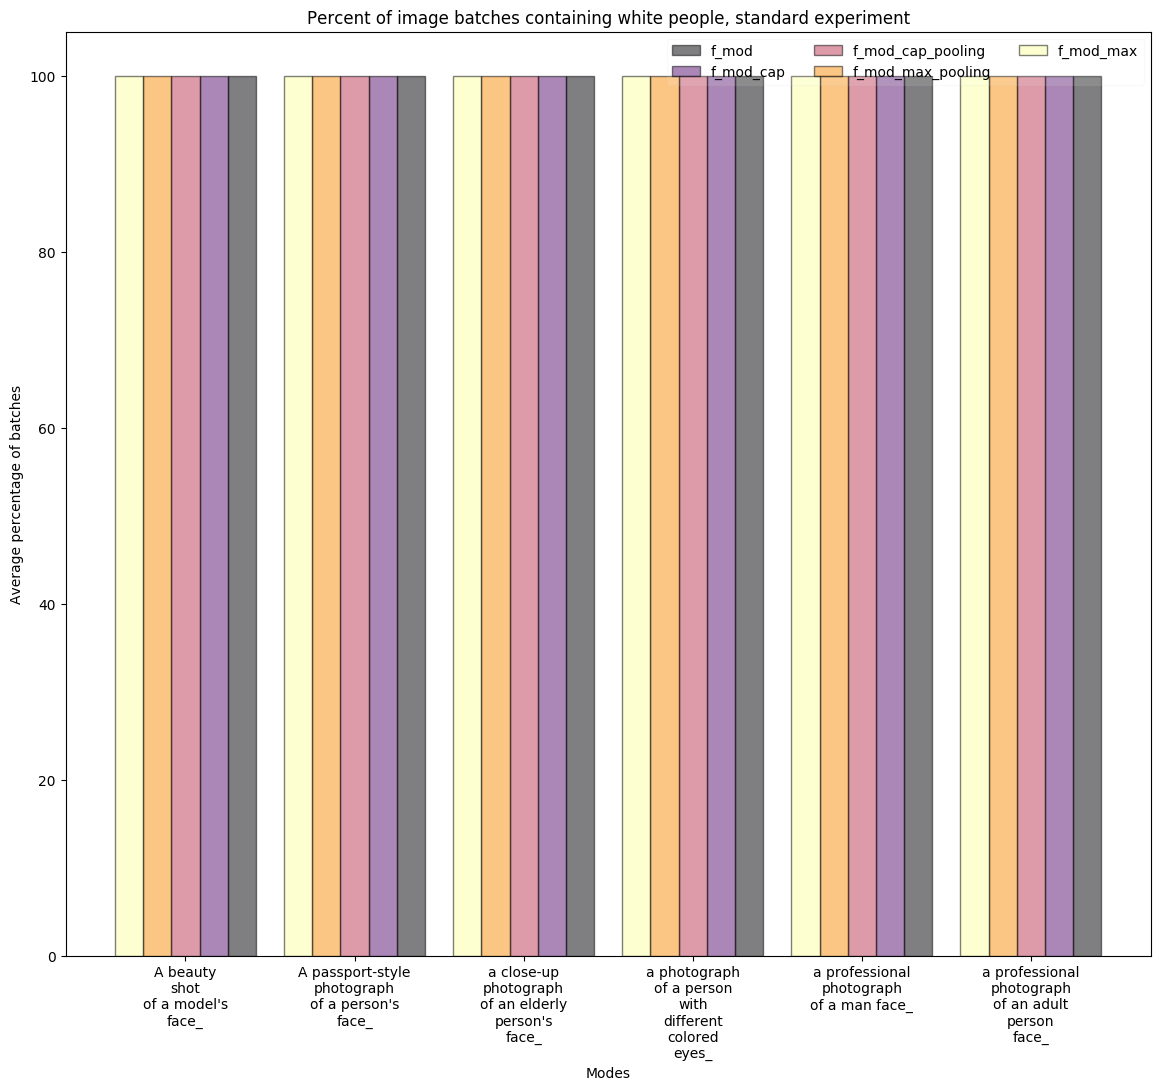

In [28]:
get_graph(prompt_white_dic, prompt_white_dic_white_num, lf, len(modes), modes, sd = None,  title = 'Percent of image batches containing white people', updated_experiment = False)

        

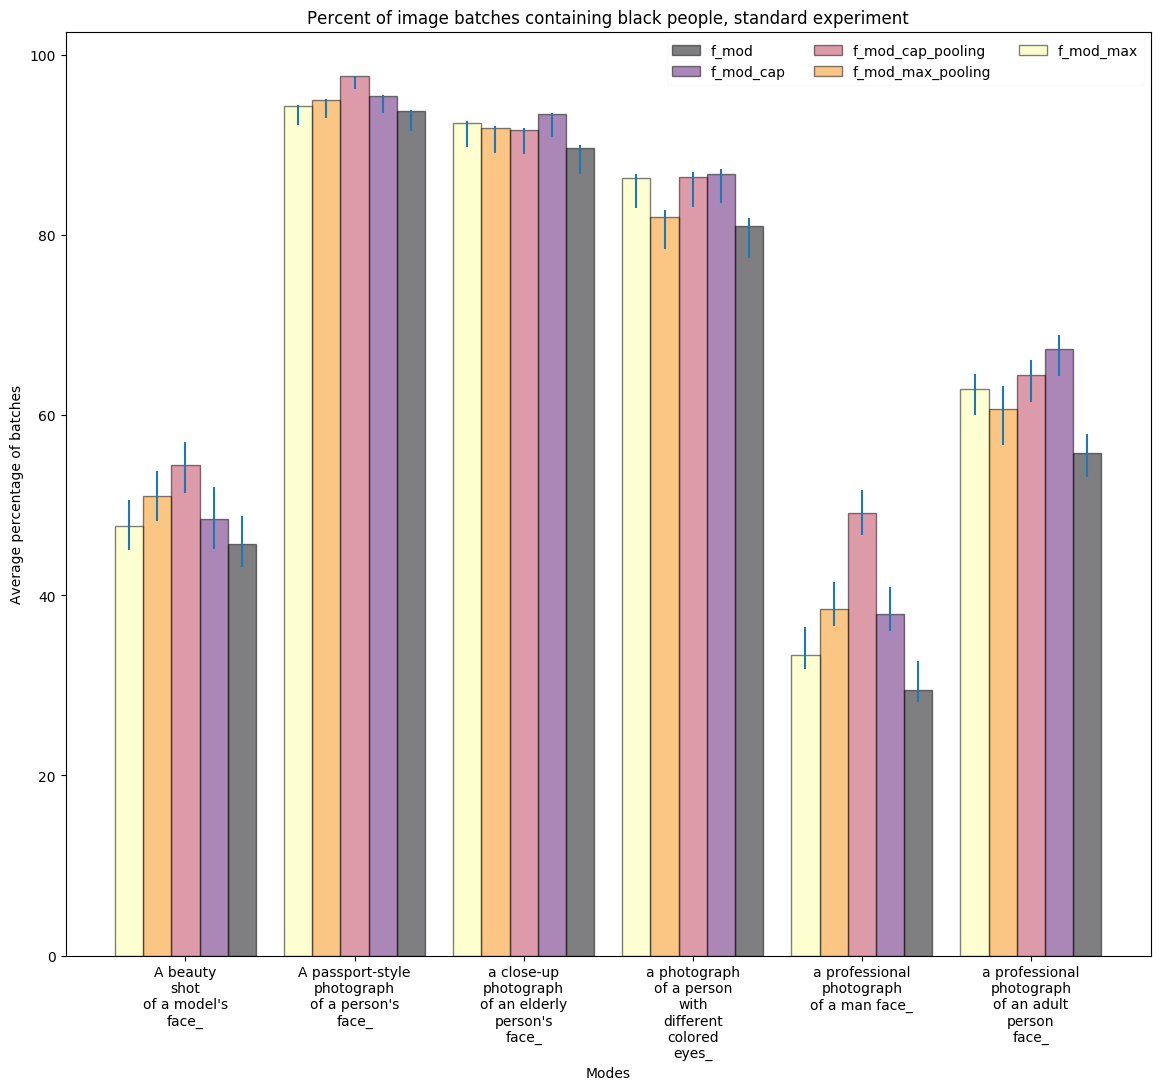

In [29]:
get_graph(prompt_black_dic, prompt_black_dic_black_num, lf, len(modes), modes, sd = None,  title = 'Percent of image batches containing black people', updated_experiment = False)


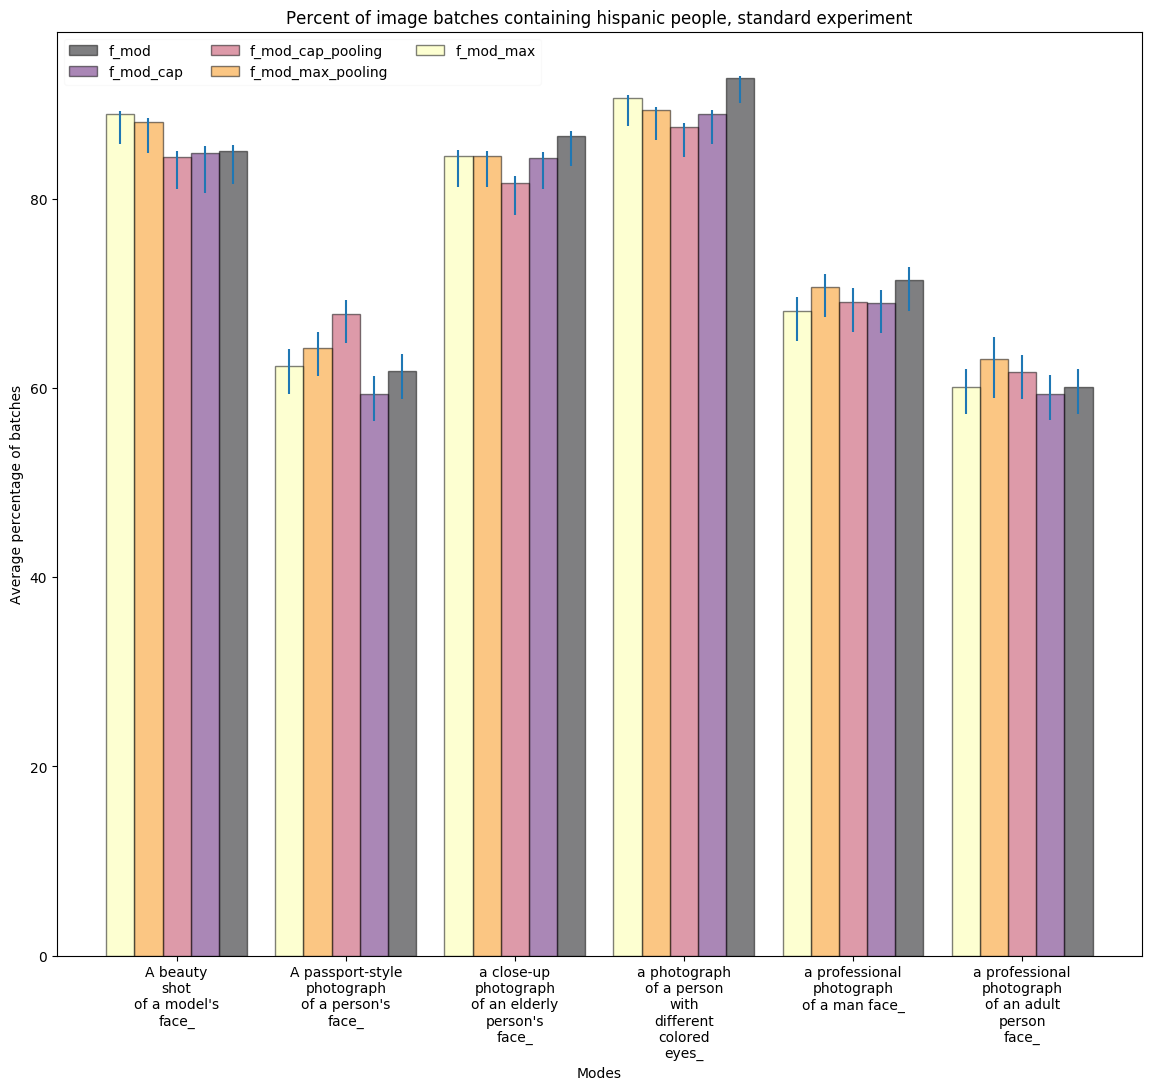

In [30]:
get_graph(prompt_hispanic_dic, prompt_hispanic_dic_hispanic_num, lf, len(modes), modes, sd = None,  title = 'Percent of image batches containing hispanic people', updated_experiment = False)


In [31]:
prompt_all = {}
prompt_num = {}

In [32]:
for k in prompt_hispanic_dic_.keys():
    if k in prompt_asian_dic_.keys() and k in prompt_white_dic_.keys() and k in prompt_black_dic_.keys():
        prompt_all[k] = {}
        prompt_num[k] = {}
        for m in prompt_hispanic_dic_[k].keys():
            if m in prompt_asian_dic_[k].keys() and m in prompt_white_dic_[k].keys() and m in prompt_black_dic_[k].keys():
                prompt_all[k][m] = 0
                prompt_num[k][m] = 0
                for b in prompt_hispanic_dic_[k][m].keys():
                    if b in prompt_asian_dic_[k][m].keys() and b in prompt_white_dic_[k][m].keys() and b in prompt_black_dic_[k][m].keys():
                         prompt_all[k][m] += prompt_hispanic_dic_[k][m][b]  * prompt_asian_dic_[k][m][b] * prompt_white_dic_[k][m][b] * prompt_black_dic_[k][m][b] 
                         prompt_num[k][m] += 1
for k in prompt_all.keys():
    for m in prompt_all[k].keys():
        prompt_all[k][m] = prompt_all[k][m] * 100 / prompt_num[k][m]

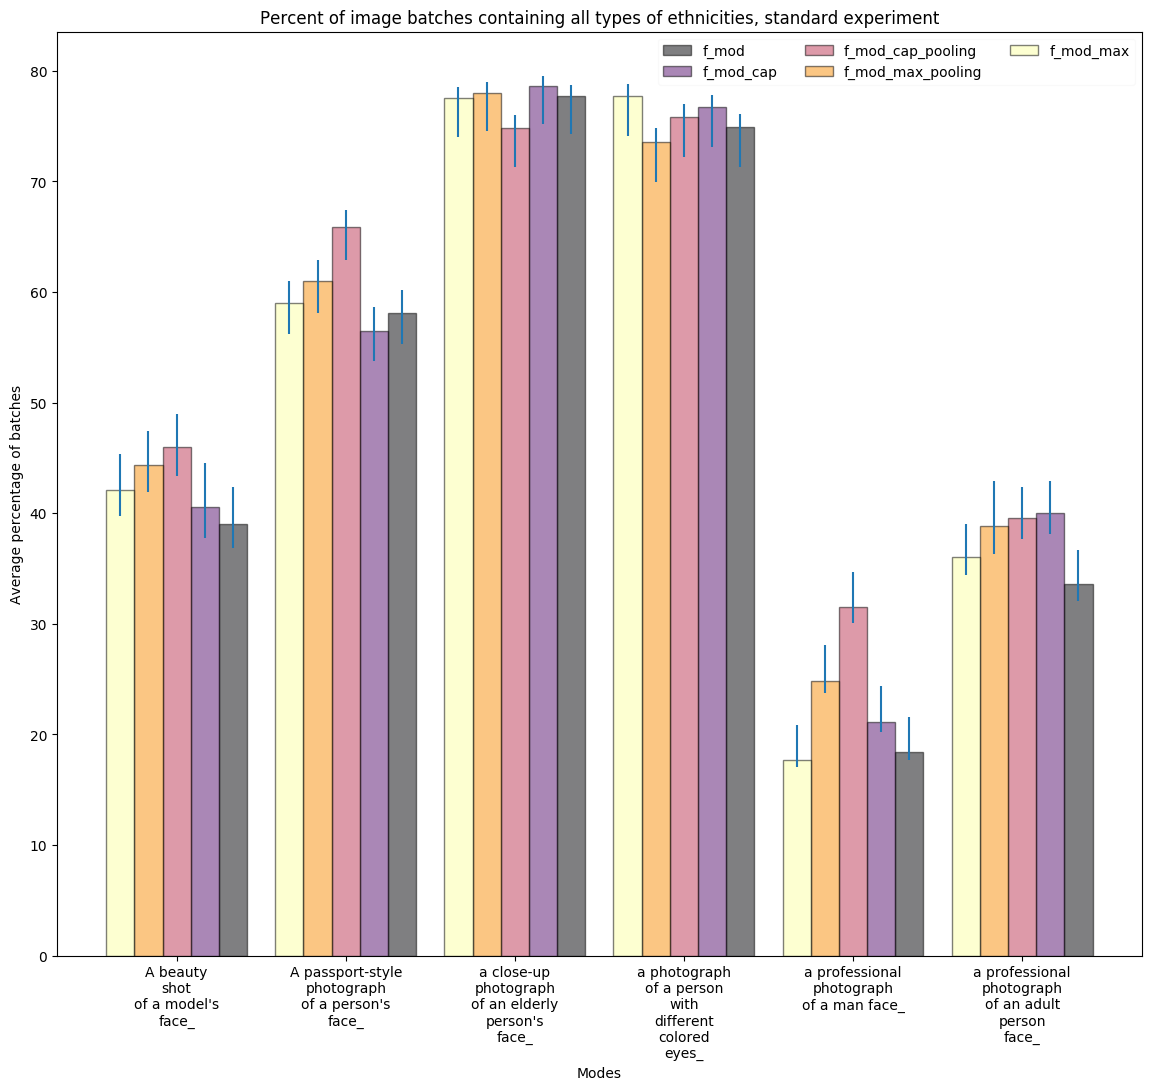

In [33]:
get_graph(prompt_all, prompt_num, lf, len(modes), modes, sd = None,  title = 'Percent of image batches containing all types of ethnicities', updated_experiment = False)


In [34]:
prompt__3_from_4 = {}
prompt_num = {}

In [35]:
for k in prompt_hispanic_dic_.keys():
    if k in prompt_asian_dic_.keys() and k in prompt_white_dic_.keys() and k in prompt_black_dic_.keys():
        prompt__3_from_4[k] = {}
        prompt_num[k] = {}
        for m in prompt_hispanic_dic_[k].keys():
            if m in prompt_asian_dic_[k].keys() and m in prompt_white_dic_[k].keys() and m in prompt_black_dic_[k].keys():
                prompt__3_from_4[k][m] = 0
                prompt_num[k][m] = 0
                for b in prompt_hispanic_dic_[k][m].keys():
                    if b in prompt_asian_dic_[k][m].keys() and b in prompt_white_dic_[k][m].keys() and b in prompt_black_dic_[k][m].keys():
                         prompt__3_from_4[k][m] += prompt_hispanic_dic_[k][m][b] * prompt_asian_dic_[k][m][b] * prompt_black_dic_[k][m][b]  + prompt_hispanic_dic_[k][m][b] * prompt_white_dic_[k][m][b] * prompt_black_dic_[k][m][b]   + prompt_hispanic_dic_[k][m][b] * prompt_asian_dic_[k][m][b] * prompt_white_dic_[k][m][b] + prompt_asian_dic_[k][m][b] * prompt_white_dic_[k][m][b] * prompt_black_dic_[k][m][b] - 3 * prompt_hispanic_dic_[k][m][b] * prompt_asian_dic_[k][m][b] * prompt_white_dic_[k][m][b] * prompt_black_dic_[k][m][b] 
                         prompt_num[k][m] += 1
for k in prompt__3_from_4.keys():
    for m in prompt__3_from_4[k].keys():
        prompt__3_from_4[k][m] = prompt__3_from_4[k][m] * 100 / prompt_num[k][m]

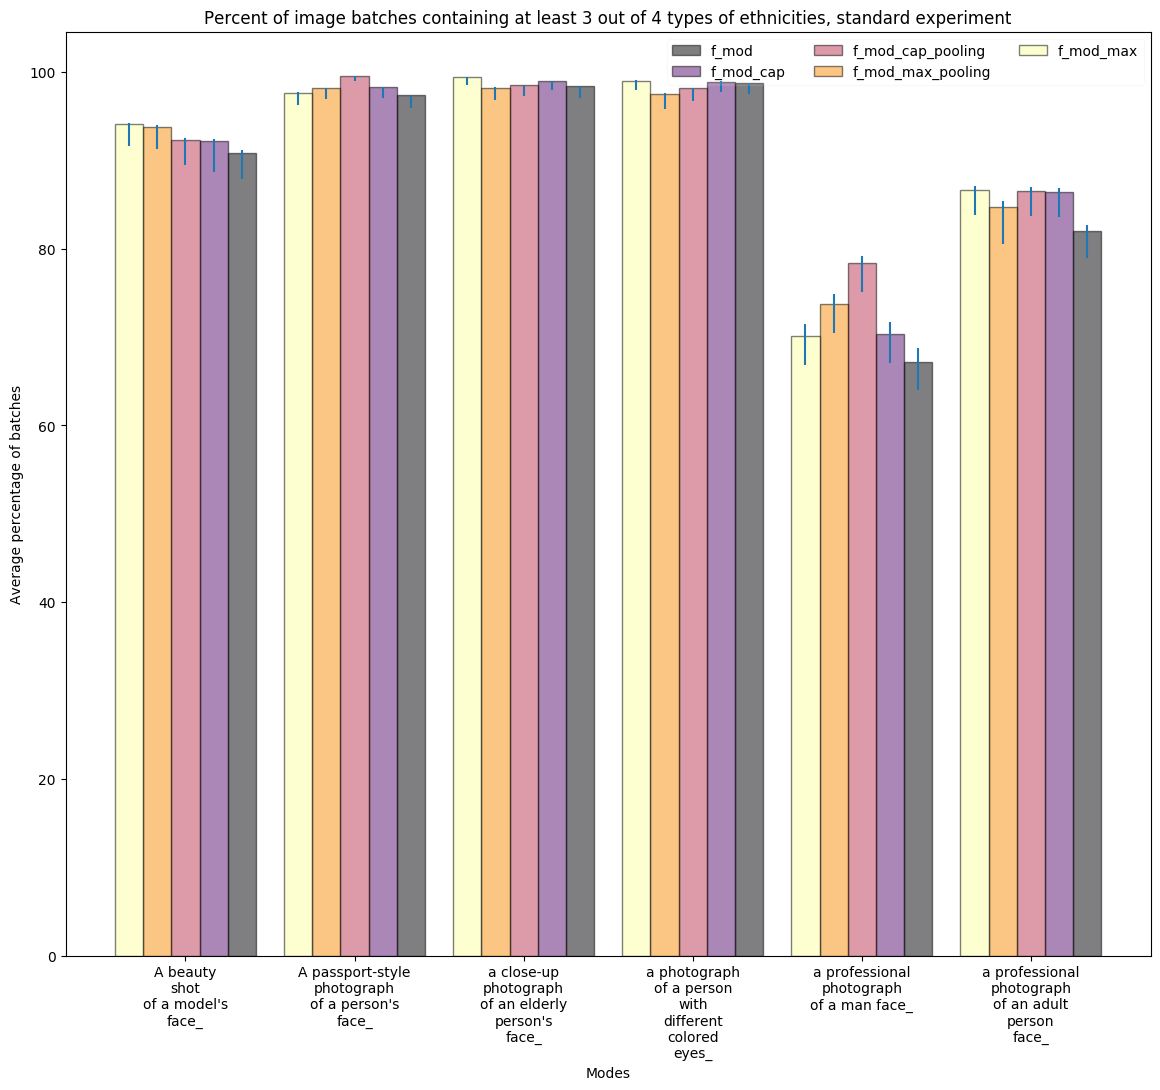

In [36]:
get_graph(prompt__3_from_4, prompt_num, lf, len(modes), modes, sd = None,  title = 'Percent of image batches containing at least 3 out of 4 types of ethnicities', updated_experiment = False)
